In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re
def get_citys_list(coordination_source):
    citys_location = {}
    for line in coordination_source.split('\n'):
        if line.startswith('//'): continue
        if line.strip() == '':    continue
            
        city = re.findall("name:'(\w+)'", line)[0]
        coor = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
        coor = tuple(map(float, coor))
        citys_location[city] = coor
    return citys_location

In [3]:
city_info = get_citys_list(coordination_source)

In [4]:
city_info

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [5]:
import math

def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance('上海', '北京')

727.52769688981

In [6]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [8]:
print(matplotlib.__path__)

['D:\\Anaconda\\anzhuang\\lib\\site-packages\\matplotlib']


In [10]:
!cd D:\Anaconda\anzhuang\Lib\site-packages\matplotlib\mpl-data\fonts\ttf

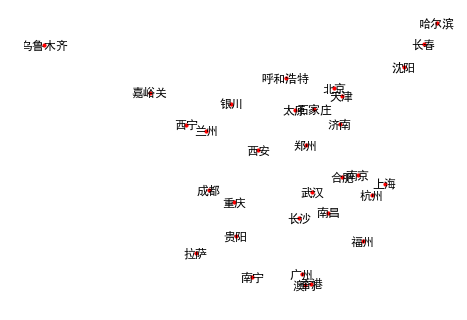

In [7]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [19]:
from collections import defaultdict # 为一个不存在的键提供默认值，从而避免KeyError异常
threshold = 900
def build_connection(city_info):
    city_conn = defaultdict(list)
    citys = city_info.keys()
    for c1 in citys:
        for c2 in citys:
            if c1 == c2:
                continue
            if get_city_distance(c1, c2) < threshold:
                city_conn[c1].append(c2)
    return city_conn
citys_conn = build_connection(city_info)

In [20]:
citys_conn

defaultdict(list,
            {'上海': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '沈阳',
              '长春',
              '北京',
              '天津'],
             '兰州': ['嘉峪关',
              '西宁',
              '成都',
              '拉萨',
              '贵阳',
              '西安',
              '重庆',
              '呼和浩特',
              '南宁',
              '银川'],
             '北京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '沈阳',
              '太原',
              '西安',
              '上海',
              '天津',
              '呼和浩特',
              '香港',
              '澳门'],
             '南京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '合肥',
       

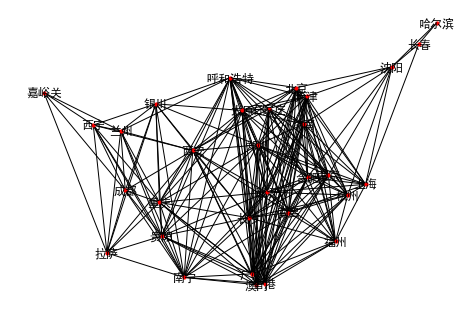

In [21]:
cities_connection_graph = nx.Graph(citys_conn)
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [26]:
def bfs_or_dfs(citys_conn, start, destination):
    paths = [[start]]
    used = set()
    while paths:
        path = paths.pop(0)
        tmp = path[-1]
        if tmp in used:
            continue
        sec_path = citys_conn[tmp]
        for city in sec_path:
            if city in path:
                continue
            new_path = path + [city]
            #pathes = [new_path] + pathes
            paths.append(new_path)
            if city == destination:
                return new_path
        used.add(tmp)

bfs_or_dfs(citys_conn, '上海', '香港')            

['上海', '石家庄', '香港']

In [78]:
def get_path_distance(path):
    distance = 0
    for i, _ in enumerate(path[:-1]):
        distance += get_city_distance(path[i], path[i+1])
    return distance
def sort_by_distance(paths):
    return sorted(paths,key=get_path_distance)

In [45]:
get_path_distance(["北京","济南","上海"])

752.66259009181

In [79]:
def bfs_or_dfs_opt(citys_conn, start, destination, strategy):
    paths = [[start]]
    used = set()
    while paths:
        path = paths.pop(0)
        tmp = path[-1]
        if tmp in used:
            continue
        sec_path = citys_conn[tmp]
        for city in sec_path:
            if city in path:
                continue
            new_path = path + [city]
            #pathes = [new_path] + pathes
            paths.append(new_path)
        paths = strategy(paths)
        used.add(tmp)
        if paths and (destination == paths[0][-1]):
#             print(paths)
            return paths[0]  

In [80]:
sort_by_distance([["北京","济南","上海"],["济南","上海"]])

[['济南', '上海'], ['北京', '济南', '上海']]

In [83]:
sort_by_distance([["北京","济南","上海"],["济南","上海"],["北京","上海"]])

[['济南', '上海'], ['北京', '上海'], ['北京', '济南', '上海']]

In [81]:
bfs_or_dfs_opt(citys_conn,'上海', '澳门',strategy=lambda x:x)

['上海', '石家庄', '澳门']

In [82]:
bfs_or_dfs_opt(citys_conn,'上海', '澳门',strategy=sort_by_distance)

['上海', '杭州', '香港', '澳门']

In [84]:
from sklearn.datasets import load_boston
import random

In [85]:
# 加载数据
dataset = load_boston()
x,y=dataset['data'],dataset['target']

In [88]:
print('x.shape:{},y.shape{}'.format(x.shape,y.shape))

x.shape:(506, 13),y.shape(506,)


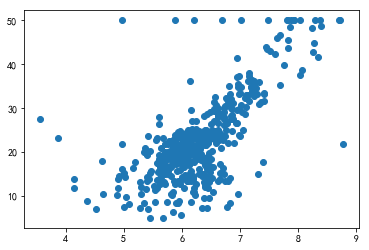

In [89]:
X_rm = x[:,5]
plt.scatter(X_rm,y)

In [106]:
def target_function(rm, k ,b):
    return k*rm + b
def mse_loss(y, y_hat):
    return sum((yi-y_hat_i)**2 for yi, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
def par_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient
def par_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2/n * gradient
k = random.random()*200 - 100
b = random.random()*200 - 100
inter_num = 75
lr = 0.001
loss = []
for i in range(inter_num):
    current = [target_function(rm, k, b) for rm in X_rm]
    loss_i = mse_loss(y, current)
    loss.append(loss_i)
    print('Iteration {}, the loss is {}, parameters k is {} and b is {}'.format(i,loss_i,k,b))
    k_gra = par_k(X_rm, y, current)
    b_gra = par_b(y, current)
    k = k -k_gra*lr
    b = b -b_gra*lr
best_k = k
best_b = b
print(best_k,best_b)

Iteration 0, the loss is 153719.93200343713, parameters k is -50.909279065264926 and b is -47.26700167372404
Iteration 1, the loss is 129563.16109584783, parameters k is -45.951322015749014 and b is -46.48750964603067
Iteration 2, the loss is 109203.65695313156, parameters k is -41.399693318637055 and b is -45.77189449712148
Iteration 3, the loss is 92044.51716055206, parameters k is -37.221092495515165 and b is -45.114921222966764
Iteration 4, the loss is 77582.66797404036, parameters k is -33.384948195423306 and b is -44.51178385220838
Iteration 5, the loss is 65394.11514307348, parameters k is -29.863194530301104 and b is -43.95807028495791
Iteration 6, the loss is 55121.51319574818, parameters k is -26.630065740773144 and b is -43.44973001321716
Iteration 7, the loss is 46463.688740839556, parameters k is -23.661907690018108 and b is -42.98304448675871
Iteration 8, the loss is 39166.81062974322, parameters k is -20.937004806582845 and b is -42.554599907658904
Iteration 9, the loss 

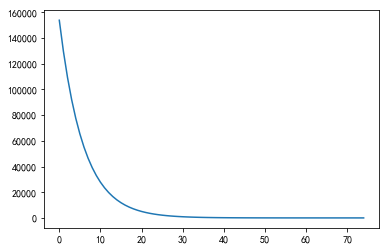

In [107]:
plt.plot(list(range(inter_num)),loss)

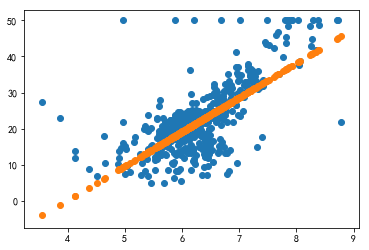

In [108]:
price_best = target_function(X_rm, best_k,best_b)

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_best)